<a href="https://colab.research.google.com/github/Subuktageen-Farooqi/ms_course_deeplearning/blob/main/ms_deeplearning_tutorial_05_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.cifar10.load_data()

train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.

class_labels = ['airplanes', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


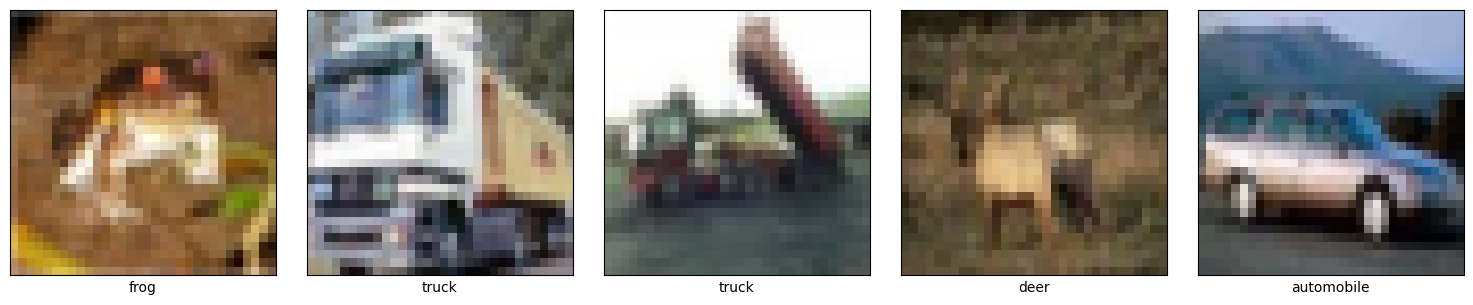

In [10]:
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i])
    plt.xlabel(class_labels[train_labels[i][0]])
plt.tight_layout()
plt.show()

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3600 - loss: 1.7348 - val_accuracy: 0.5656 - val_loss: 1.2192
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5829 - loss: 1.1751 - val_accuracy: 0.6150 - val_loss: 1.0754
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6497 - loss: 1.0015 - val_accuracy: 0.6665 - val_loss: 0.9689
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6872 - loss: 0.8949 - val_accuracy: 0.6687 - val_loss: 0.9426
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7176 - loss: 0.8026 - val_accuracy: 0.6900 - val_loss: 0.9014
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7350 - loss: 0.7505 - val_accuracy: 0.7090 - val_loss: 0.8458
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7605 - loss: 0.6820 - val_accuracy: 0.7050 - val_loss: 0.8720
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7705 - loss: 0.6463 -

In [18]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7155 - loss: 0.8672
Test Accuracy: 0.7111999988555908


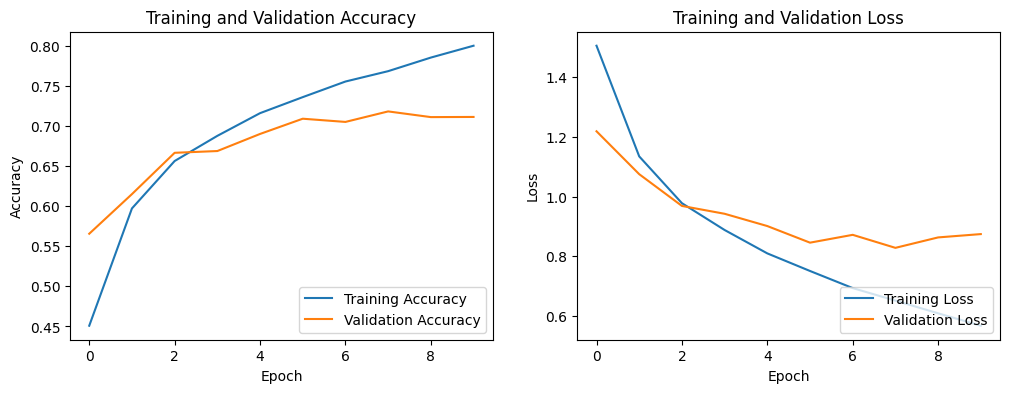

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()

In [21]:
predictions = model.predict(test_imgs[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


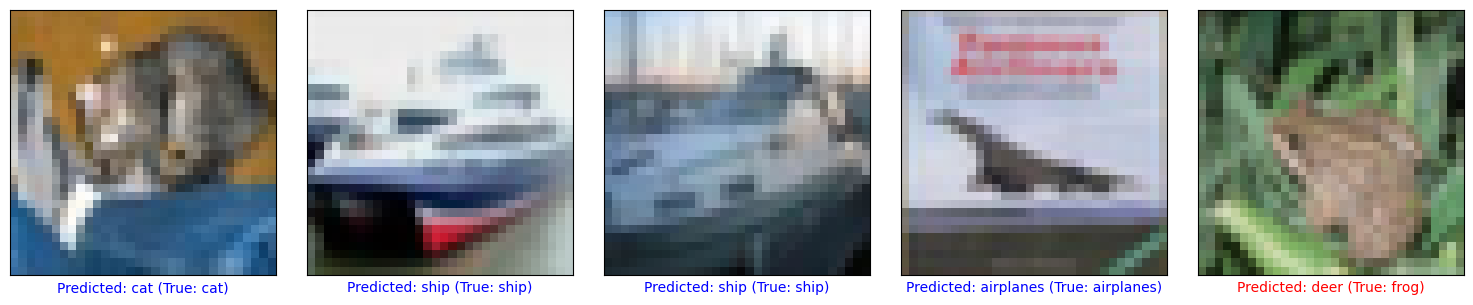

In [22]:
def plot_img(i, predictions_array, true_labels, imgs, class_labels):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], imgs[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)

  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel(f"Predicted: {class_labels[predicted_label]} (True: {class_labels[true_label[0]]})", color=color)

plt.figure(figsize=(15, 3))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plot_img(i, predictions, test_labels, test_imgs, class_labels)

plt.tight_layout()
plt.show()

# **TASK 1**

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 666,538 (2.54 MB)

 Trainable params: 666,538 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3562 - loss: 1.7317 - val_accuracy: 0.6410 - val_loss: 1.0056
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6589 - loss: 0.9566 - val_accuracy: 0.7139 - val_loss: 0.8224
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7378 - loss: 0.7374 - val_accuracy: 0.7279 - val_loss: 0.7801
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7906 - loss: 0.5993 - val_accuracy: 0.7514 - val_loss: 0.7218
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8263 - loss: 0.4929 - val_accuracy: 0.7658 - val_loss: 0.6935
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8637 - loss: 0.3944 - val_accuracy: 0.7597 - val_loss: 0.7569
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8838 - loss: 0.3253 - val_accuracy: 0.7552 - val_loss: 0.8566
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9087 - loss: 0.2592 -

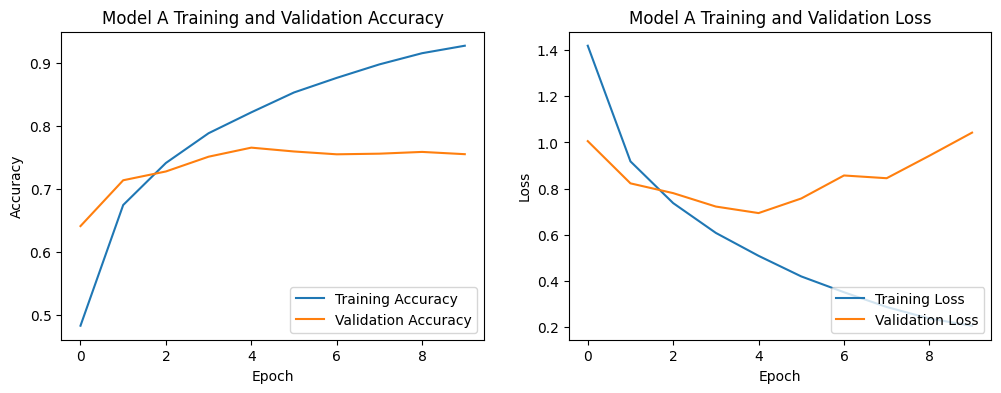

In [37]:
# Variant A: Bigger filters / more channels (strong baseline)
def build_model_A():
    model = models.Sequential([
        layers.Input((32,32,3)),

        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model
modelA = build_model_A()
modelA.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelA.summary()

historyA = modelA.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels))

test_loss, test_acc = modelA.evaluate(test_imgs, test_labels)
print(f"Model A Test Accuracy: {test_acc}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historyA.history['accuracy'], label='Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model A Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(historyA.history['loss'], label='Training Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.title('Model A Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 32, 32, 32)     │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 32, 32, 32)     │         9,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 16, 16, 64)     │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 16, 16, 64)     │        37,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (None, 8, 8, 128)      │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,498 (2.55 MB)

 Trainable params: 666,858 (2.54 MB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4774 - loss: 1.4855 - val_accuracy: 0.5954 - val_loss: 1.1524
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7282 - loss: 0.7751 - val_accuracy: 0.7219 - val_loss: 0.7853
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7832 - loss: 0.6167 - val_accuracy: 0.7214 - val_loss: 0.8406
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8203 - loss: 0.5165 - val_accuracy: 0.7630 - val_loss: 0.6687
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8514 - loss: 0.4314 - val_accuracy: 0.7470 - val_loss: 0.7910
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8749 - loss: 0.3573 - val_accuracy: 0.7657 - val_loss: 0.7291
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8981 - loss: 0.2951 - val_accuracy: 0.7949 - val_loss: 0.6382
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9170 - loss: 0.2414 -

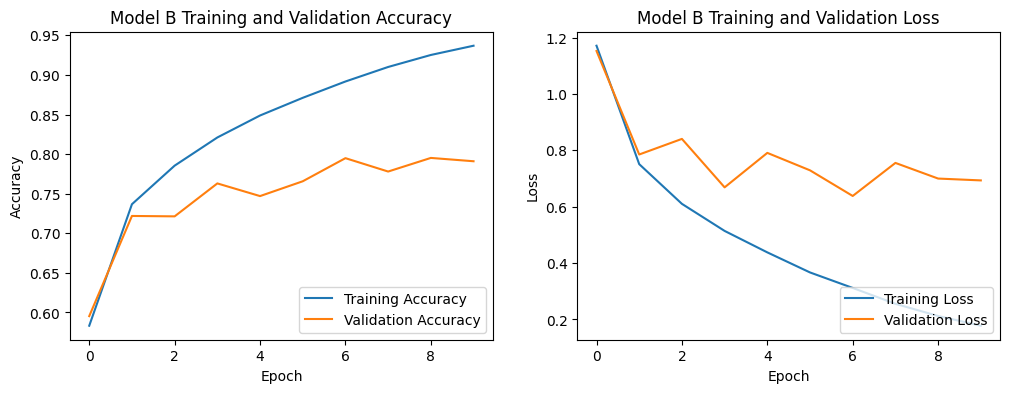

In [17]:
# Variant B: Add BatchNorm (usually improves stability + accuracy)
def conv_bn(filters):
    return models.Sequential([
        layers.Conv2D(filters, 3, padding="same", use_bias=False),
        layers.BatchNormalization(),
        layers.Activation("relu"),
    ])

def build_model_B():
    inputs = layers.Input((32,32,3))
    x = conv_bn(32)(inputs); x = conv_bn(32)(x); x = layers.MaxPooling2D()(x)
    x = conv_bn(64)(x);      x = conv_bn(64)(x); x = layers.MaxPooling2D()(x)
    x = conv_bn(128)(x);                     x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

modelB = build_model_B()
modelB.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelB.summary()

historyB = modelB.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels))

test_loss, test_acc = modelB.evaluate(test_imgs, test_labels)
print(f"Model A Test Accuracy: {test_acc}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historyB.history['accuracy'], label='Training Accuracy')
plt.plot(historyB.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model B Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(historyB.history['loss'], label='Training Loss')
plt.plot(historyB.history['val_loss'], label='Validation Loss')
plt.title('Model B Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,050 (433.79 KB)

 Trainable params: 111,050 (433.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2814 - loss: 1.8998 - val_accuracy: 0.4883 - val_loss: 1.4007
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4933 - loss: 1.3735 - val_accuracy: 0.5553 - val_loss: 1.2154
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5600 - loss: 1.2079 - val_accuracy: 0.6008 - val_loss: 1.1009
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6025 - loss: 1.1020 - val_accuracy: 0.6321 - val_loss: 1.0322
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6368 - loss: 1.0047 - val_accuracy: 0.6626 - val_loss: 0.9513
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6574 - loss: 0.9474 - val_accuracy: 0.6726 - val_loss: 0.9218
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6872 - loss: 0.8806 - val_accuracy: 0.6852 - val_loss: 0.8989
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7042 - loss: 0.8372 

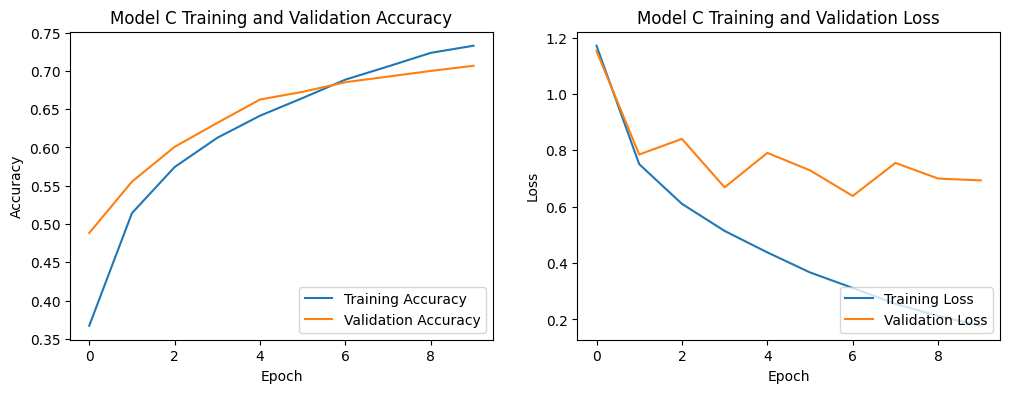

In [18]:
# Variant C: Replace Flatten with GlobalAveragePooling (often reduces overfitting)
def build_model_C():
    inputs = layers.Input((32,32,3))
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

modelC = build_model_C()
modelC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelC.summary()

historyC = modelC.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels))

test_loss, test_acc = modelC.evaluate(test_imgs, test_labels)
print(f"Model C Test Accuracy: {test_acc}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historyC.history['accuracy'], label='Training Accuracy')
plt.plot(historyC.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model C Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(historyB.history['loss'], label='Training Loss')
plt.plot(historyB.history['val_loss'], label='Validation Loss')
plt.title('Model C Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()

# **Task 2**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1567 - loss: 2.2105 - val_accuracy: 0.3764 - val_loss: 1.6988 - learning_rate: 0.0500
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3694 - loss: 1.7255 - val_accuracy: 0.4142 - val_loss: 1.6358 - learning_rate: 0.0500
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3849 - loss: 1.6969 - val_accuracy: 0.4100 - val_loss: 1.6112 - learning_rate: 0.0500
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3921 - loss: 1.6828 - val_accuracy: 0.3821 - val_loss: 1.7288 - learning_rate: 0.0500
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3796 - loss: 1.7053
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.02500000037252903.
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3796 - loss: 1.7053 - val_accuracy: 0.4157 - val_loss: 1.7020 - learning_rate: 0.0500
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4325 

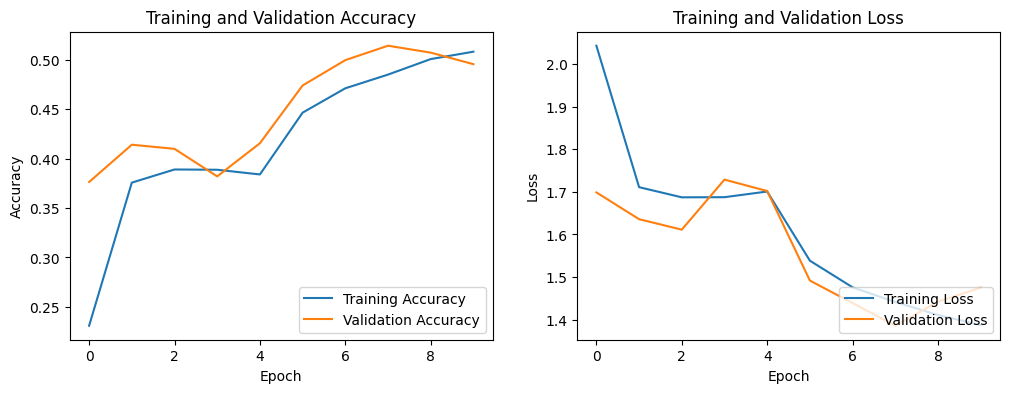

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


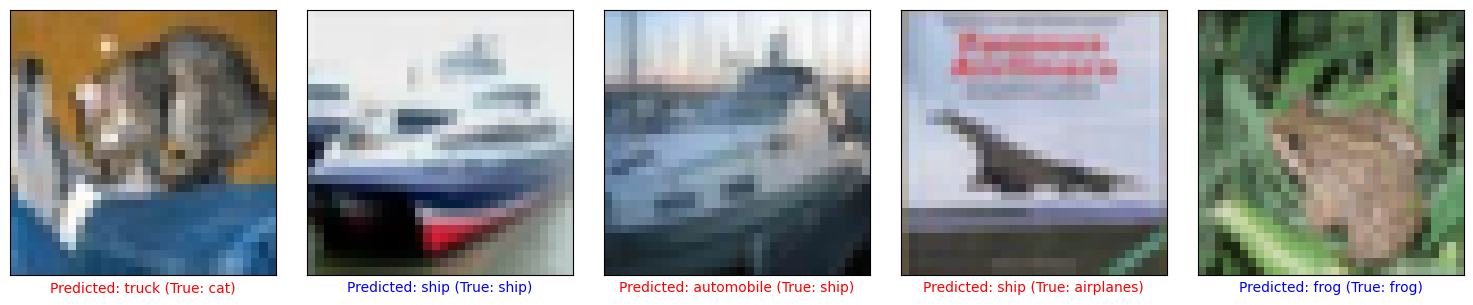

In [27]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomTranslation(0.05, 0.05),
])

model = models.Sequential([
    # ------------------------------------------
    # Improving accuracy - data augmentation
    layers.Input(shape=(32, 32, 3)),
    data_aug,
    # ------------------------------------------
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

# ------------------------------------------
# Improving accuracy - better optimizer setup
opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, nesterov=True)
# ------------------------------------------
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ----------------------------------------------------------
# Improving accuracy - Train a bit longer + LR scheduling
lr_sched = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1
)
history = model.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels), callbacks=[lr_sched])
# ----------------------------------------------------------

test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f"Test Accuracy: {test_acc}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()

predictions = model.predict(test_imgs[:5])

def plot_img(i, predictions_array, true_labels, imgs, class_labels):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], imgs[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)

  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel(f"Predicted: {class_labels[predicted_label]} (True: {class_labels[true_label[0]]})", color=color)

plt.figure(figsize=(15, 3))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plot_img(i, predictions, test_labels, test_imgs, class_labels)

plt.tight_layout()
plt.show()

# **Task 3 - We will use Variant A since its classic overfitting**

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ ?                      │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.3567 - loss: 1.7742 - val_accuracy: 0.6100 - val_loss: 1.1516
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6187 - loss: 1.1435 - val_accuracy: 0.6869 - val_loss: 0.9882
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6971 - loss: 0.9465 - val_accuracy: 0.7267 - val_loss: 0.8891
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7470 - loss: 0.8306 - val_accuracy: 0.7584 - val_loss: 0.8233
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7785 - loss: 0.7628 - val_accuracy: 0.7510 - val_loss: 0.8618
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8039 - loss: 0.7041 - val_accuracy: 0.7774 - val_loss: 0.8067
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8209 - loss: 0.6617 - val_accuracy: 0.7807 - val_loss: 0.8076
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8391 - loss: 0.6304 -

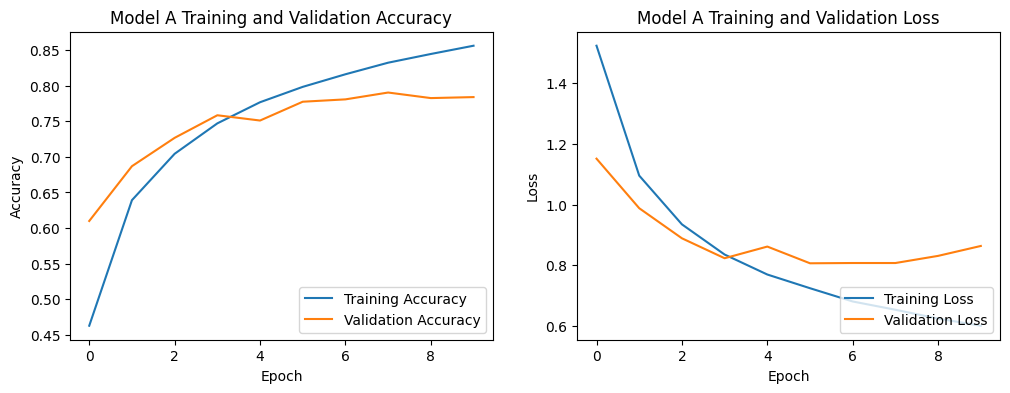

In [38]:
# Variant A: Bigger filters / more channels (strong baseline)
def build_model_A():
    reg = tf.keras.regularizers.L2(1e-4)

    model = models.Sequential([
        # ---------------------------------------------------------
        # L2 weight decay
        layers.Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer=reg),
        layers.Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer=reg),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=reg),
        layers.Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer=reg),
        layers.MaxPooling2D(),

        layers.Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=reg),
        layers.MaxPooling2D(),
        # --------------------------------------------------------
        # Dropout
        layers.SpatialDropout2D(0.2),
        # --------------------------------------------------------
        layers.Flatten(),
        # L2 weight decay
        layers.Dense(256, activation="relu", kernel_regularizer=reg),
        layers.Dense(10, activation="softmax"),
        # --------------------------------------------------------
        # Dropout
        #layers.Dropout(0.3),
        # --------------------------------------------------------
    ])
    return model

modelA = build_model_A()
modelA.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelA.summary()

early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True
)

historyA = modelA.fit(train_imgs, train_labels, epochs=20, validation_data=(test_imgs, test_labels), callbacks=[early])

test_loss, test_acc = modelA.evaluate(test_imgs, test_labels)
print(f"Model A Test Accuracy: {test_acc}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historyA.history['accuracy'], label='Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model A Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(historyA.history['loss'], label='Training Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.title('Model A Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()